In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
# from torch.utils.data import DataLoader
import torch.utils.data

In [2]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
# Hyper-parameters 
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

## 数据准备

- download=true会同时下载训练集和测试集
- train=true表示创建的对象的属性包含的是训练集（要么是训练集要么是测试集，见_load_data()）

In [4]:
# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='../../data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9912422/9912422 [00:10<00:00, 906545.54it/s] 


Extracting ../../data\MNIST\raw\train-images-idx3-ubyte.gz to ../../data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28881/28881 [00:00<00:00, 63509.98it/s]


Extracting ../../data\MNIST\raw\train-labels-idx1-ubyte.gz to ../../data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1648877/1648877 [00:06<00:00, 241845.71it/s]


Extracting ../../data\MNIST\raw\t10k-images-idx3-ubyte.gz to ../../data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4542/4542 [00:00<00:00, 939236.25it/s]


Extracting ../../data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ../../data\MNIST\raw



In [5]:
test_dataset = torchvision.datasets.MNIST(root='../../data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

### train_dataset

- 数据存在data、targets两个属性里
- 每个元素的含义
  - train_dataset.data[i]：表示第 i 张图片，是一个尺寸为 [28, 28] 的二维张量。
  - train_dataset.data[i][j]：表示第 i 张图片的第 j 行，是一个尺寸为 [28] 的一维张量。
  - train_dataset.data[i][j][k]：表示第 i 张图片的第 j 行第 k 列的像素值，是一个整数，范围在 0 到 255 之间，表示灰度值。

In [21]:
# 张量操作
print(type(train_dataset.data))
print(train_dataset.data.shape)
print(type(train_dataset.targets))
print(train_dataset.targets.shape)

<class 'torch.Tensor'>
torch.Size([60000, 28, 28])
<class 'torch.Tensor'>
torch.Size([60000])


In [22]:
print(train_dataset.data[0])

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

In [23]:
import matplotlib.pyplot as plt

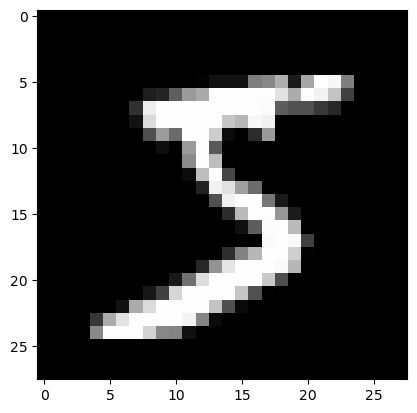

In [24]:
first_image = train_dataset.data[0]
first_image_np = first_image.numpy()

plt.imshow(first_image_np, cmap='gray')
plt.show()

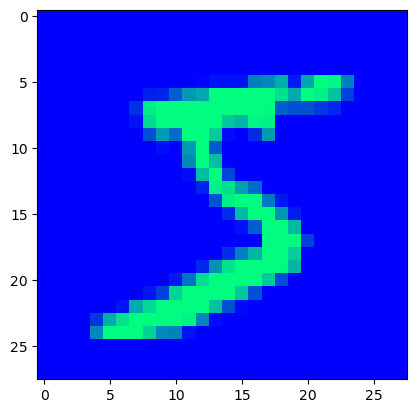

In [25]:
plt.imshow(first_image_np, cmap='winter')
plt.show()

In [26]:
print(train_dataset.targets)
print(train_dataset.targets[0])

tensor([5, 0, 4,  ..., 5, 6, 8])
tensor(5)


- __getitem__函数（索引访问）

In [6]:
type(train_dataset[0])

tuple

- 规定了transform函数所以返回的是tensor，不然是图片

In [7]:
print(train_dataset[0])

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

### train_loader and test_loader

- 访问批次数据
    - 在每次迭代中，train_loader 返回一个包含数据和目标的元组 (data, target)：
      - data 是一个张量，包含一个批次的图像数据。其形状为 [batch_size, 1, 28, 28]，表示 batch_size 张图片，每张图片有 1 个通道（灰度图），高度和宽度均为 28 像素。
      - target 是一个张量，包含一个批次的标签。其形状为 [batch_size]，表示每张图片对应的标签。

In [33]:
type(train_loader.dataset[0])

tuple

In [8]:
print(train_loader.batch_size)

100


In [32]:
data, target = train_loader.dataset[0]
print(f"Data shape: {data.shape}")
print(f"Target: {target}")

Data shape: torch.Size([1, 28, 28])
Target: 5


## 模型定义、训练和测试

In [27]:
# 没有预先写好的数学公式，所以不知道怎么写代码
class Mlp(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Mlp, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

model = Mlp(input_size, hidden_size, num_classes).to(device)

In [28]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [29]:
# Train the model
total_step = len(train_loader) # 样本个数
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

SyntaxError: incomplete input (1131132123.py, line 4)